In [1]:
## importing all the required libraries for visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load titanic dataset from pandas
df = pd.read_csv('titanic.csv')

In [3]:
print(df.shape)

(891, 15)


In [4]:
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None


In [6]:
print(df['embarked'].unique())

['S' 'C' 'Q' nan]


In [7]:
print(df['class'].value_counts())

class
Third     491
First     216
Second    184
Name: count, dtype: int64


In [8]:
print(df.describe(include='all'))

          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alive  \
count   8

In [ ]:
## pclass, 1st = Upper, 2nd = Middle and 3rd = Lower
## sibsp, number of siblings and spouse aboard
## parch = number of parents /childeren aboard

In [20]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


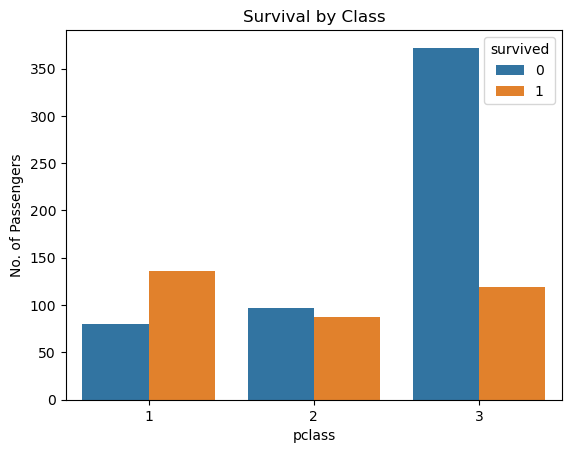

In [24]:
# I want to see the survial rate for each class
sns.countplot(data = df, x = 'pclass', hue = 'survived')
plt.title("Survival by Class")
plt.ylabel("No. of Passengers")
plt.show()

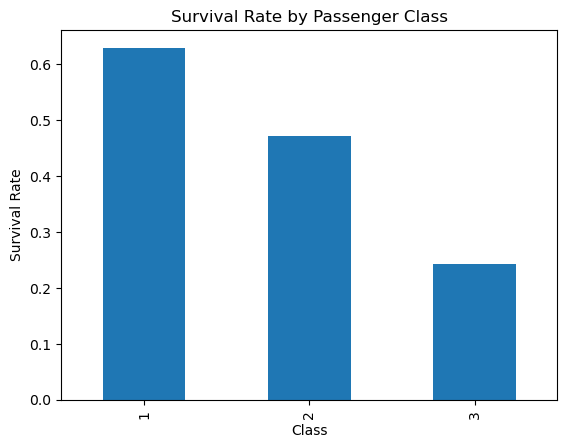

In [25]:
survival_rate = df.groupby('pclass')['survived'].mean()

# Plot
survival_rate.plot(kind='bar')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Class')
plt.show()

In [26]:
print(survival_rate)

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


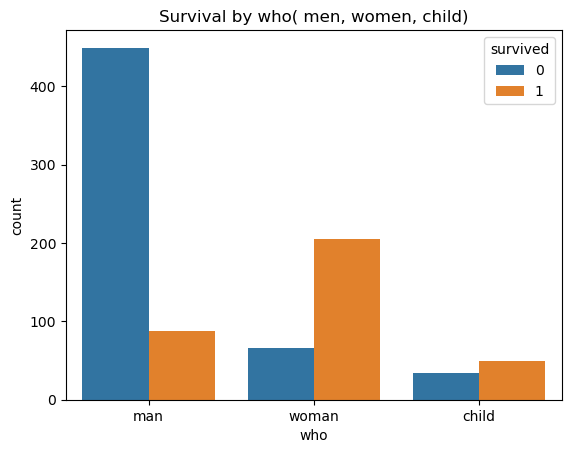

In [27]:
#survival by who (men, women, child)
sns.countplot(data = df, x='who', hue='survived')
plt.title('Survival by who( men, women, child)')
plt.show()

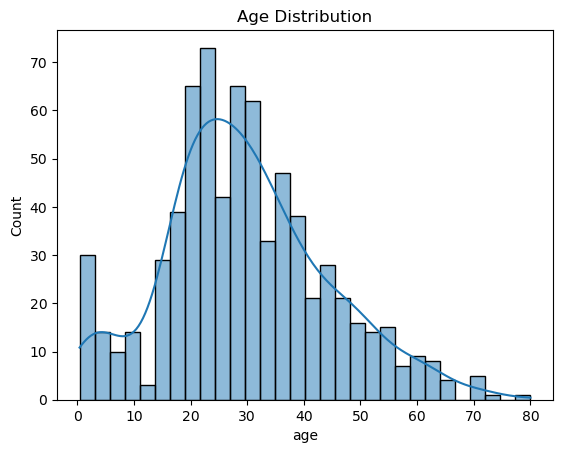

In [28]:
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

In [98]:
# custom function to define age group
def ageGroup(age):
    if age < 10:
        return 
    elif age < 20:
        return "Teen"
    elif age < 30:
        return "Twenties"
    elif age < 40:
        return "Thirties"
    elif age < 50:
        return "Fourties"
    elif age < 60:
        return "Fifties"
    elif age <70:
        return "Sixties"
    elif pd.isna(age):
        return "Unknown"
    else:
        return "60+"
        
df['ageGroup'] = df['age'].apply(ageGroup)

age_order = ["Teen", "Twenties", "Thirties", "Fourties", "Fifties", "Sixties", "60+", "Unknown"]
df['ageGroup'] = pd.Categorical(df['ageGroup'], categories=age_order, ordered=True)

print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  ageGroup  
0    man        True  NaN  Southampton    no  False  Twenties  
1  woman       False    C    Cherbourg   yes  False  Thirties  
2  woman       False  NaN  Southampton   yes   True  Twenties  
3  woman       False    C  Southampton   yes  False  Thirties  
4    man        True  NaN  Southampton    no   True  Thirties  


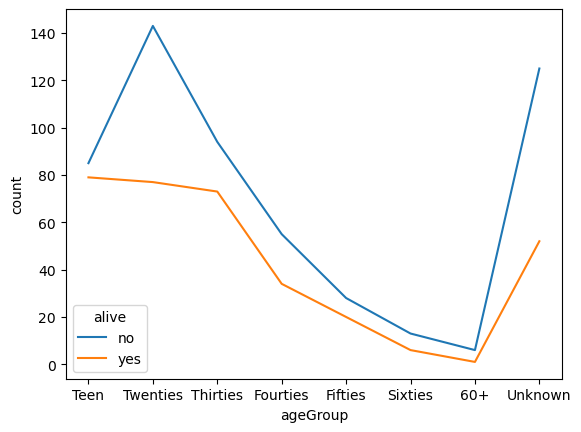

In [99]:
survival_in_each_group = df.groupby(['ageGroup', 'alive'], observed=True).size().reset_index(name='count')

sns.lineplot(data= survival_in_each_group, x='ageGroup', y='count', hue ='alive')
plt.show()